In [1]:
#import libraries

import warnings

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler,StandardScaler, LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from scipy.stats import pearsonr, shapiro

#model building
from sklearn import linear_model
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline, make_pipeline

warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [3]:
#load datasets
store_df = pd.read_csv('/content/gdrive/MyDrive/datasets/rossman_store.csv')
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [4]:
train_df = pd.read_csv('/content/gdrive/MyDrive/datasets/rossman_train.csv')
test_df = pd.read_csv('/content/gdrive/MyDrive/datasets/rossman_test.csv')
train_df

<ipython-input-4-7c6ab7552d35>:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('/content/gdrive/MyDrive/datasets/rossman_train.csv')


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [5]:
#merge both dataframes based on store number
df = pd.merge(train_df, store_df, on='Store')
df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,2013-01-05,4771,339,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017205,1115,5,2013-01-04,4540,326,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017206,1115,4,2013-01-03,4297,300,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017207,1115,3,2013-01-02,3697,305,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [6]:
df.shape

(1017209, 18)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

- Categorical: Date, StateHoliday, StoreType, Assortment, PromoInterval
- Continuous: Store. DayOfWeek, Sales, Customers, Open, Promo, SchoolHoliday, CompetitionDistance, CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2, Promo2SinceWeek, Promo2SinceYear

In [8]:
#check for missing values
df.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

- Some columns have misssing values

In [9]:
#unique valuea
df.nunique()

Store                         1115
DayOfWeek                        7
Date                           942
Sales                        21734
Customers                     4086
Open                             2
Promo                            2
StateHoliday                     5
SchoolHoliday                    2
StoreType                        4
Assortment                       3
CompetitionDistance            654
CompetitionOpenSinceMonth       12
CompetitionOpenSinceYear        23
Promo2                           2
Promo2SinceWeek                 24
Promo2SinceYear                  7
PromoInterval                    3
dtype: int64

**EDA**

In [10]:
# create year and month cols
df['Year']  = df['Date'].apply(lambda x: int(str(x)[:4]))
df['Month'] = df['Date'].apply(lambda x: int(str(x)[5:7]))
df.drop(['Date'],axis=1,inplace=True)

df

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month
0,1,5,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7
1,1,4,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7
2,1,3,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7
3,1,2,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7
4,1,1,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,4771,339,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,1
1017205,1115,5,4540,326,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,1
1017206,1115,4,4297,300,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,1
1017207,1115,3,3697,305,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,1


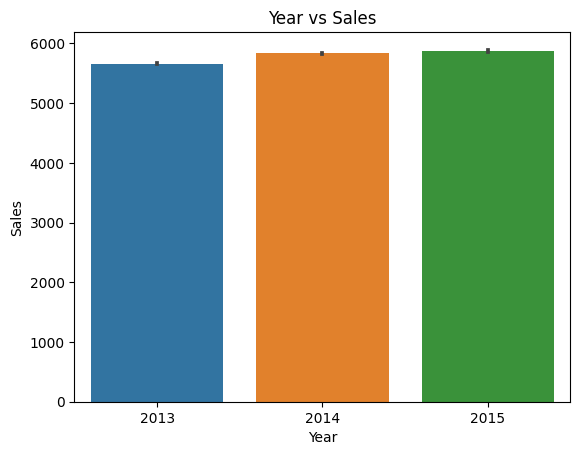

In [11]:
#yearly sales
sns.barplot(x='Year', y='Sales', data=df).set(title='Year vs Sales');

- There is an increase in sales over the years.

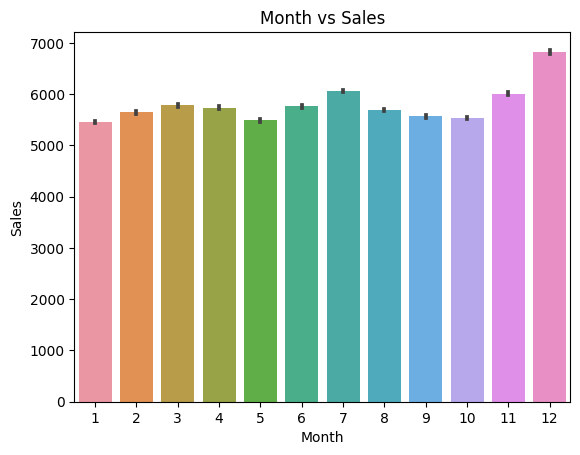

In [12]:
#monthly sales
sns.barplot(x='Month', y='Sales', data=df).set(title='Month vs Sales');

- December has the highest sales.

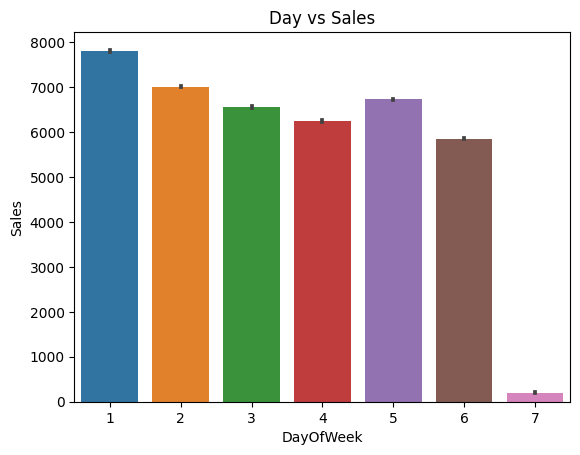

In [13]:
# weekly sales
sns.barplot(x='DayOfWeek', y='Sales', data=df).set(title='Day vs Sales');

- Most sales happen on Monday.

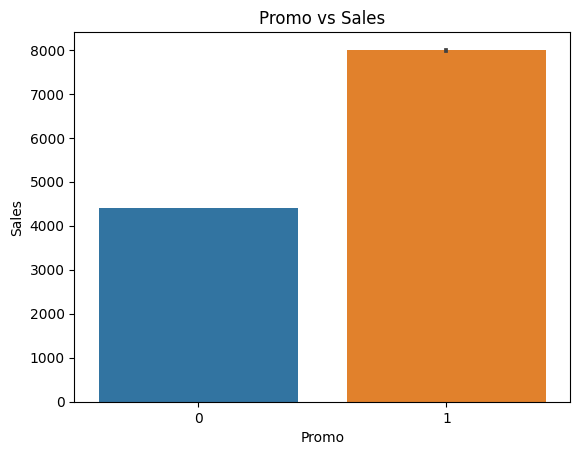

In [14]:
#sales during promotion
sns.barplot(x='Promo', y='Sales', data=df).set(title='Promo vs Sales');

- Sales are higher during promotions.

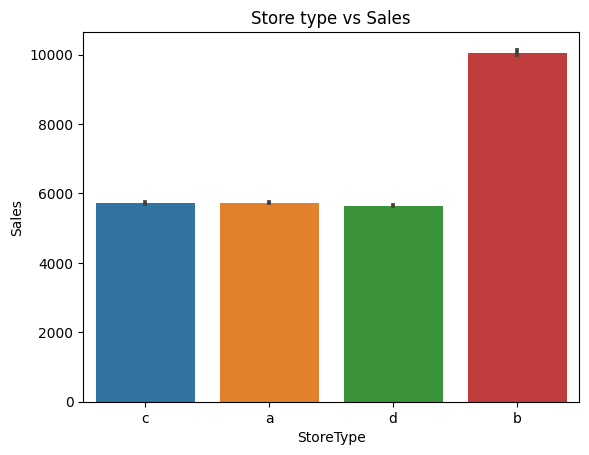

In [15]:
#store type
sns.barplot(x='StoreType', y='Sales', data=df).set(title='Store type vs Sales');

- Store type b, has the highest sales.

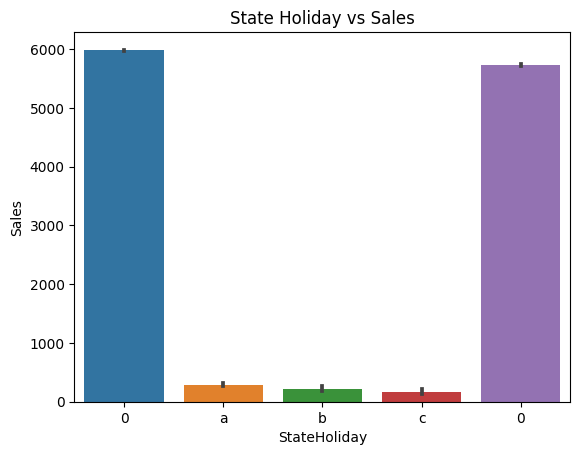

In [16]:
#state holiday
sns.barplot(x='StateHoliday', y='Sales', data=df).set(title='State Holiday vs Sales');

- Most stores are closed during holidays hence lower or no sales.

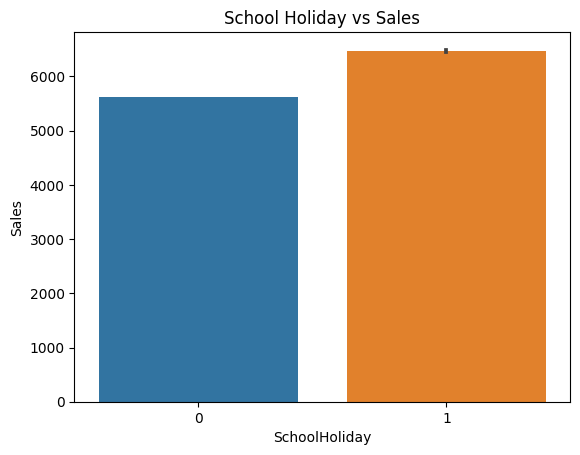

In [17]:
#school holiday
sns.barplot(x='SchoolHoliday', y='Sales', data=df).set(title='School Holiday vs Sales');

- Higher sales during closure of public schools.

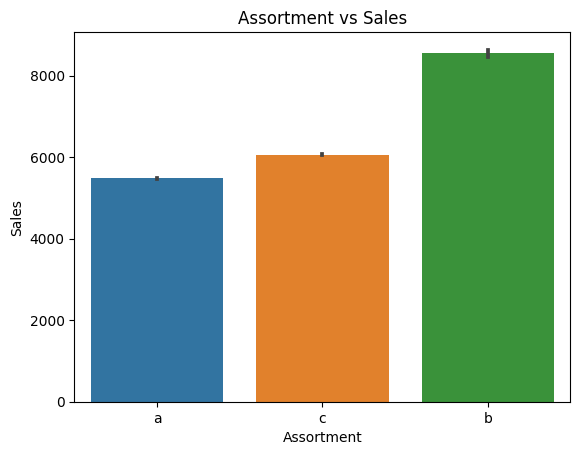

In [18]:
#Assortment
sns.barplot(x='Assortment', y='Sales', data=df).set(title='Assortment vs Sales');

- b (extra) has the highest sales.

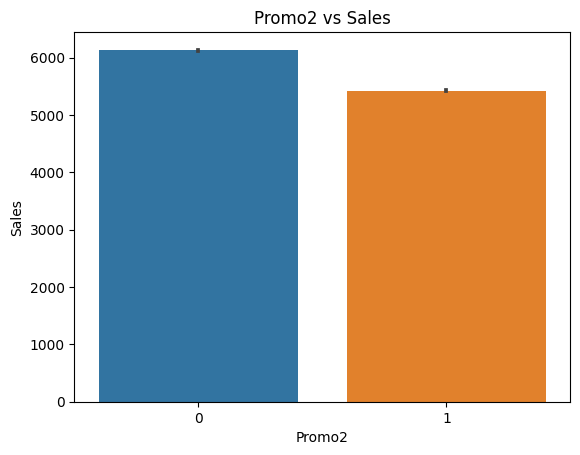

In [19]:
#promo2
sns.barplot(x='Promo2', y='Sales', data=df).set(title='Promo2 vs Sales');

- Higher sales when the store is not participating

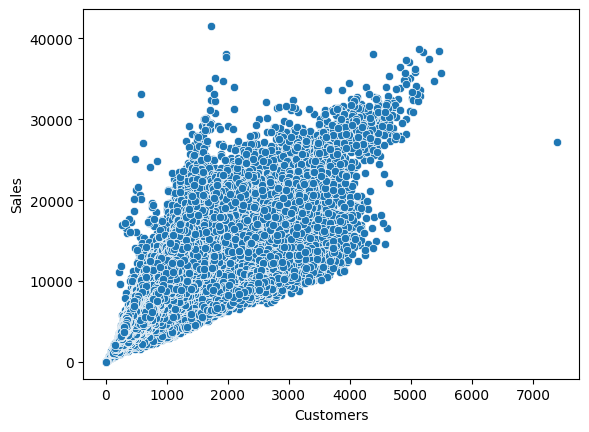

In [20]:
#customers
sns.scatterplot(data=df, x='Customers', y='Sales');

- Positive relationship between customers and sales. The higher the number of customers in the store, the higher the sales.

**Imputing Missing Values**

In [21]:
df.isnull().sum()

Store                             0
DayOfWeek                         0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
Year                              0
Month                             0
dtype: int64

- Since the number of missing values is too high we can't just drop them, so we'll have to fill in values.
- The null values in Promo2SinceWeek, Promo2SinceYear and PromoInterval is because Promo2 is 0 for those scores. So we'll fill those with 0.

In [22]:
# filling Promo2SinceWeek, Promo2SinceYear, PromoInterval with 0
df.update(df[['Promo2SinceWeek','Promo2SinceYear','PromoInterval']].fillna(0))

- The Competition Distance for some stores isn't given, we could fill it with the mean of the distance given for all other stores.

In [23]:
df['CompetitionDistance'].fillna(df['CompetitionDistance'].mean(), inplace=True)

- We can fill CompetitionOpenSinceMonth and CompetitionOpenSinceYear using the most occuring month and year respectively.

In [24]:
#filling compettition open since month with mode
df['CompetitionOpenSinceMonth'] = df['CompetitionOpenSinceMonth'].fillna(df['CompetitionOpenSinceMonth'].mode()[0])

In [25]:
#filling compettition open since year with mode
df['CompetitionOpenSinceYear'] = df['CompetitionOpenSinceYear'].fillna(df['CompetitionOpenSinceYear'].mode()[0])

In [26]:
#check if all missing values were filled
df.isnull().sum()

Store                        0
DayOfWeek                    0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
Year                         0
Month                        0
dtype: int64

- There are no missing values in the dataset

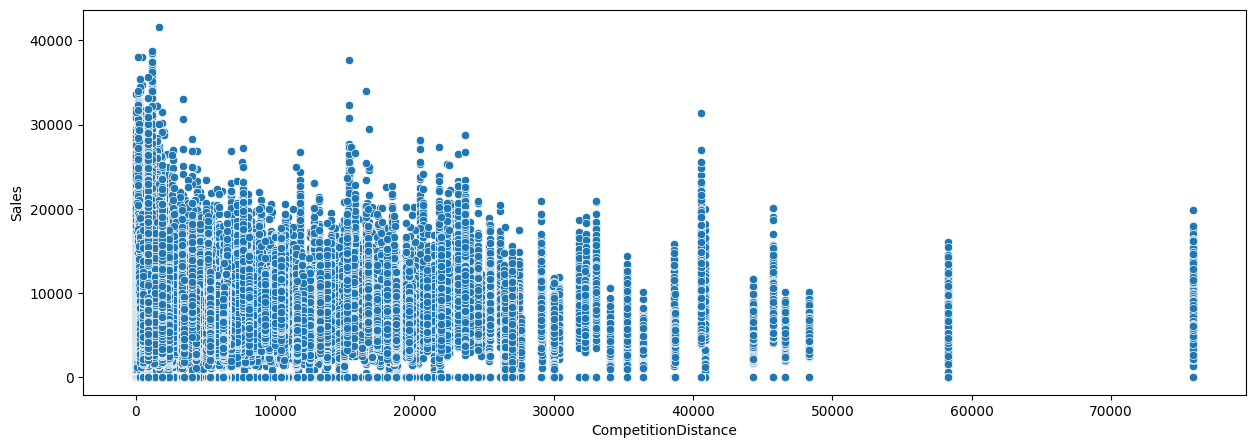

In [27]:
#competition distance
plt.figure(figsize=(15,5))
sns.scatterplot(data=df, x='CompetitionDistance', y='Sales');

- The closer the stores are the more sales

**Outlier Treatment**

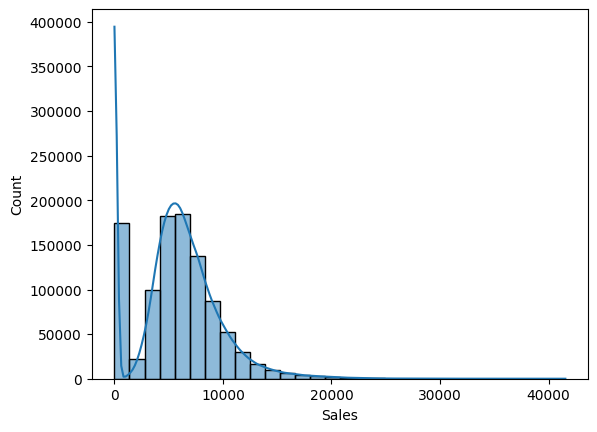

In [28]:
#distribution of sales
sns.histplot(data=df, x="Sales", bins=30, kde=True);

**Calculate Z-Score**

In [29]:
#mean
sales_mean = np.mean(df.Sales.values)
#std
sales_std = np.std(df.Sales.values.tolist())

print("Mean of Sales: ", sales_mean)
print("Standard Deviation of Sales: ", sales_std)

Mean of Sales:  5773.818972305593
Standard Deviation of Sales:  3849.924282837463


In [30]:
#check for infinity values
np.isinf(df[['Sales']]).values.sum()

0

In [31]:
# from each observation subtract mean and divide by std
df['sales_zscore'] = (df.Sales  - sales_mean ) / sales_std
df[["Store", "Sales", "sales_zscore"]].head()

,Store,Sales,sales_zscore
0,1,5263,-0.132683
1,1,5020,-0.195801
2,1,4782,-0.257620
3,1,5011,-0.198139
4,1,6102,0.085244


In [32]:
#extreme values based on sales
df[(df.sales_zscore<-3) | (df.sales_zscore>3)]

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,sales_zscore
3404,4,1,17412,2216,1,0,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,2013,12,3.022964
6244,7,1,18413,1490,1,1,0,0,a,c,24000.0,4.0,2013.0,0,0.0,0.0,0,2013,12,3.282969
6384,7,1,17567,1622,1,1,0,1,a,c,24000.0,4.0,2013.0,0,0.0,0.0,0,2013,7,3.063224
9648,11,1,17724,1788,1,1,0,0,a,c,960.0,11.0,2011.0,1,1.0,2012.0,"Jan,Apr,Jul,Oct",2014,12,3.104004
10005,11,1,22822,2849,1,0,0,1,a,c,960.0,11.0,2011.0,1,1.0,2012.0,"Jan,Apr,Jul,Oct",2013,12,4.428186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016260,1114,1,21237,2962,1,1,0,0,a,c,870.0,9.0,2013.0,0,0.0,0.0,0,2013,1,4.016490
1016262,1114,6,18856,3065,1,0,0,0,a,c,870.0,9.0,2013.0,0,0.0,0.0,0,2013,1,3.398036
1016263,1114,5,18371,3036,1,0,0,1,a,c,870.0,9.0,2013.0,0,0.0,0.0,0,2013,1,3.272059
1016264,1114,4,18463,3211,1,0,0,1,a,c,870.0,9.0,2013.0,0,0.0,0.0,0,2013,1,3.295956


In [33]:
#find the sales value corresponding to z = 3 and -3. These will be the upper and lower caps.
z_3 = (3 * sales_std)+ (sales_mean)
print(z_3)

z_minus3 = (sales_mean) - (3 * sales_std)
print(z_minus3)

17323.591820817983
-5775.953876206797


In [34]:
#replace values by capping with upper and lower limits

df['Sales'][(df.sales_zscore<-3)] = z_minus3
df['Sales'][(df.sales_zscore>3)] = z_3

<ipython-input-34-28fafaad926f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sales'][(df.sales_zscore<-3)] = z_minus3
<ipython-input-34-28fafaad926f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sales'][(df.sales_zscore>3)] = z_3


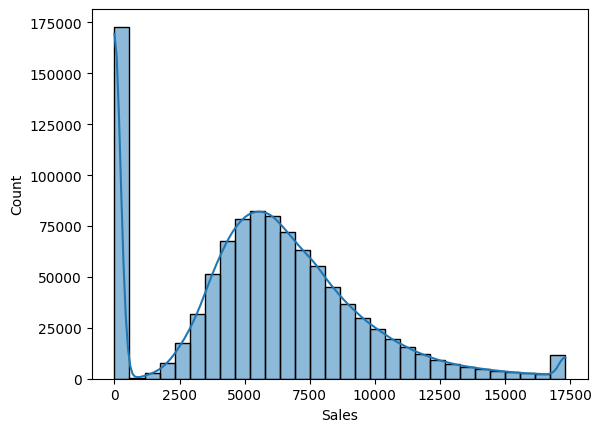

In [35]:
sns.histplot(data=df, x="Sales", bins=30, kde=True);

- The distribution is normal, with the exception of cases where the sales were zero, so we can explore that.

In [36]:
#cases where stores were open but no sales were made that day

zero_sales = df.loc[(df['Sales'] == 0) & (df['Open'] == 1) &
            (df['StateHoliday'] == 0) & (df['SchoolHoliday'] == 0)]

print("Size of data where sales were zero even when stores were open: ",len(zero_sales))

zero_sales.head()

Size of data where sales were zero even when stores were open:  12


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,sales_zscore
22589,25,4,0.0,0,1,0,0,0,c,a,430.0,4.0,2003.0,0,0.0,0.0,0,2014,2,-1.499723
22590,25,3,0.0,0,1,0,0,0,c,a,430.0,4.0,2003.0,0,0.0,0.0,0,2014,2,-1.499723
25212,28,4,0.0,0,1,1,0,0,a,a,1200.0,10.0,2014.0,1,6.0,2015.0,"Mar,Jun,Sept,Dec",2014,9,-1.499723
205303,227,4,0.0,0,1,0,0,0,a,a,2370.0,9.0,2013.0,0,0.0,0.0,0,2014,9,-1.499723
297110,327,3,0.0,0,1,0,0,0,c,c,1390.0,12.0,2004.0,0,0.0,0.0,0,2014,3,-1.499723


In [37]:
#drop these values

df.drop(df.loc[(df['Sales'] == 0) & (df['Open'] == 1) &
               (df['StateHoliday'] == 0) &
               (df['SchoolHoliday'] == 0)].index,inplace=True)
df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,sales_zscore
0,1,5,5263.0,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,-0.132683
1,1,4,5020.0,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,-0.195801
2,1,3,4782.0,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,-0.257620
3,1,2,5011.0,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,-0.198139
4,1,1,6102.0,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,0.085244


**Encoding Categorical Variables**

In [38]:
label_encoder = LabelEncoder()

#store type
df['StoreType']= label_encoder .fit_transform(df['StoreType'])

In [39]:
#assortment
df['Assortment']= label_encoder.fit_transform(df['Assortment'])

In [40]:
#promo interval
df["PromoInterval"].loc[df["PromoInterval"] == "Jan,Apr,Jul,Oct"] = 1
df["PromoInterval"].loc[df["PromoInterval"] == "Feb,May,Aug,Nov"] = 2
df["PromoInterval"].loc[df["PromoInterval"] == "Mar,Jun,Sept,Dec"] = 3

df['PromoInterval'] = df['PromoInterval'].astype(int)

<ipython-input-40-9791e3fcfa56>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["PromoInterval"].loc[df["PromoInterval"] == "Jan,Apr,Jul,Oct"] = 1
<ipython-input-40-9791e3fcfa56>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["PromoInterval"].loc[df["PromoInterval"] == "Feb,May,Aug,Nov"] = 2
<ipython-input-40-9791e3fcfa56>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["PromoInterval"].loc[df["PromoInterval"] == "Mar,Jun,

In [41]:
# state holiday
df["StateHoliday"].loc[df["StateHoliday"] == "a"] = 1
df["StateHoliday"].loc[df["StateHoliday"] == "b"] = 2
df["StateHoliday"].loc[df["StateHoliday"] == "c"] = 3

df['StateHoliday'] = df['StateHoliday'].astype(int)

<ipython-input-41-32e9d19003ac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["StateHoliday"].loc[df["StateHoliday"] == "a"] = 1
<ipython-input-41-32e9d19003ac>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["StateHoliday"].loc[df["StateHoliday"] == "b"] = 2
<ipython-input-41-32e9d19003ac>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["StateHoliday"].loc[df["StateHoliday"] == "c"] = 3


In [42]:
df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,sales_zscore
0,1,5,5263.0,555,1,1,0,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,-0.132683
1,1,4,5020.0,546,1,1,0,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,-0.195801
2,1,3,4782.0,523,1,1,0,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,-0.257620
3,1,2,5011.0,560,1,1,0,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,-0.198139
4,1,1,6102.0,612,1,1,0,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,0.085244


In [43]:
#drop sales_zcsore
df = df.drop(["sales_zscore"], axis=1)
df

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month
0,1,5,5263.0,555,1,1,0,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
1,1,4,5020.0,546,1,1,0,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
2,1,3,4782.0,523,1,1,0,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
3,1,2,5011.0,560,1,1,0,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
4,1,1,6102.0,612,1,1,0,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,4771.0,339,1,0,0,1,3,2,5350.0,9.0,2013.0,1,22.0,2012.0,3,2013,1
1017205,1115,5,4540.0,326,1,0,0,1,3,2,5350.0,9.0,2013.0,1,22.0,2012.0,3,2013,1
1017206,1115,4,4297.0,300,1,0,0,1,3,2,5350.0,9.0,2013.0,1,22.0,2012.0,3,2013,1
1017207,1115,3,3697.0,305,1,0,0,1,3,2,5350.0,9.0,2013.0,1,22.0,2012.0,3,2013,1


<Axes: >

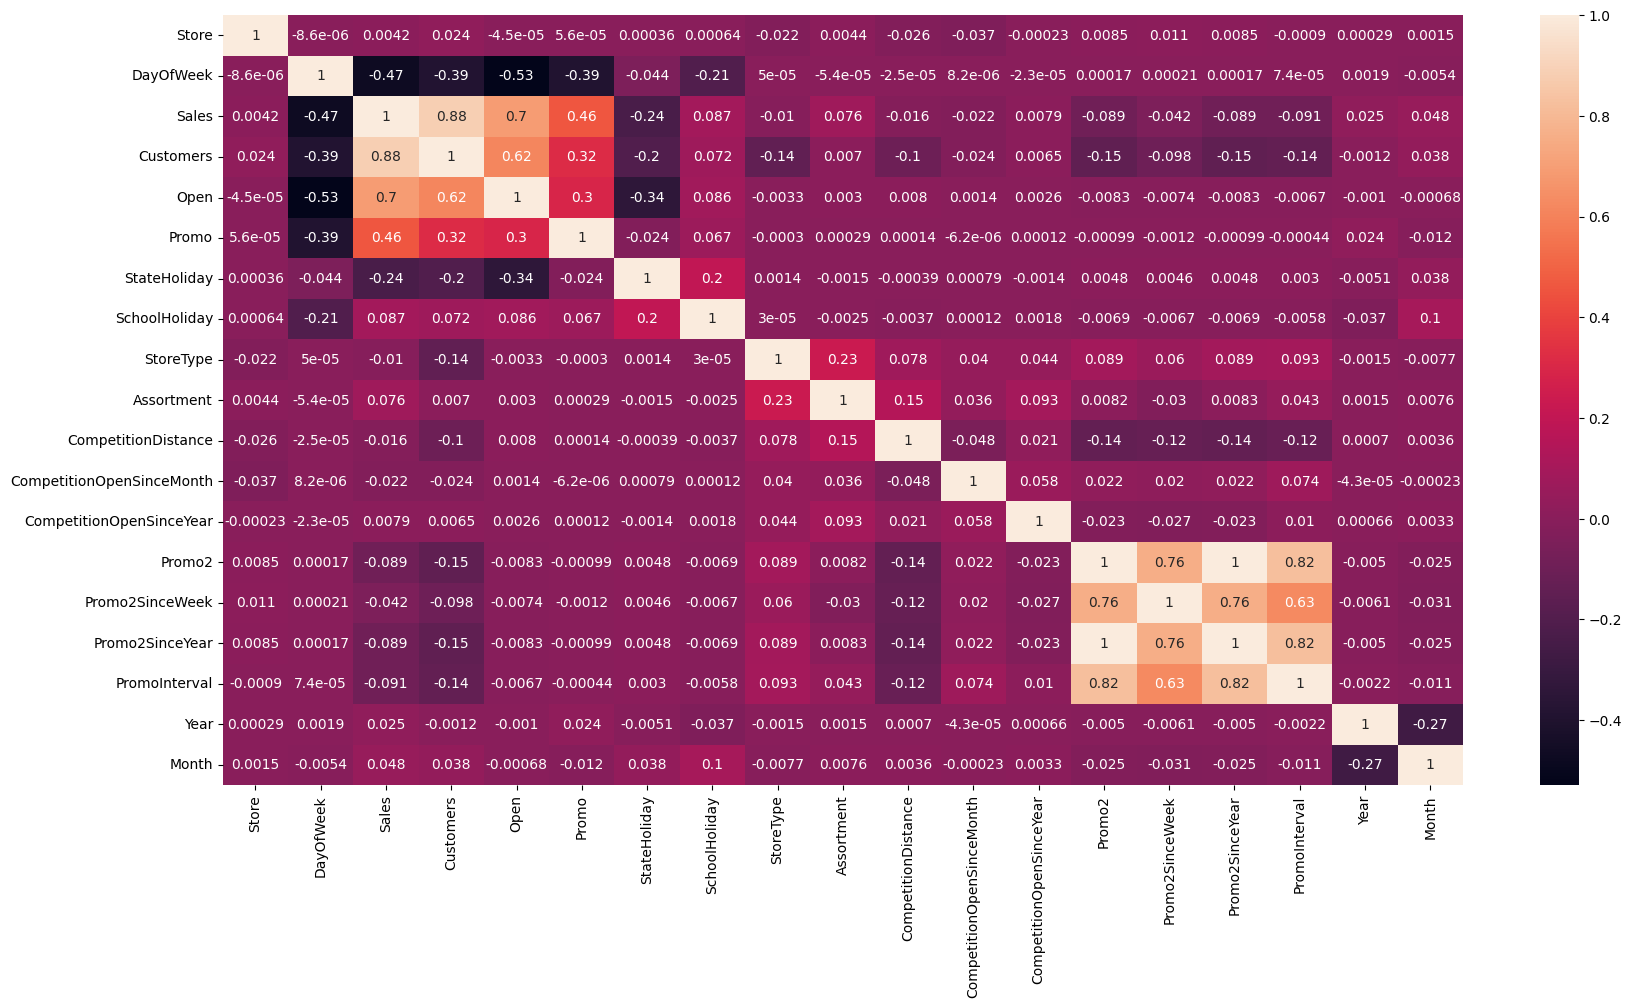

In [44]:
#heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

- Sales has a high correlation with Customers, Open and Promo

In [45]:
#open stores
mask1 = df["Open"] == 1
df_open = df[mask1]

#closed stores
mask2 = df["Open"] == 0
df_closed = df[mask2]

print("df_open shape:", df_open.shape)
print("df_closed shape:", df_closed.shape)

df_open shape: (844380, 19)
df_closed shape: (172817, 19)


In [46]:
#create target feature

target = "Sales"
X = df_open.drop(columns=['Sales','Customers', 'Open'], axis=1)
y = df_open[target]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (844380, 16)
y shape: (844380,)


In [47]:
#split into train_test

X_train, X_test, y_train, y_test_open = train_test_split(
    X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test_open shape:", y_test_open.shape)

X_train shape: (675504, 16)
y_train shape: (675504,)
X_test shape: (168876, 16)
y_test_open shape: (168876,)


**Build Model**

**Model 1: Linear Regression**

In [48]:
#fit model
linear_model = linear_model.LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

Evaluation

In [49]:
#make predictions
y_pred_open = linear_model.predict(X_test)
y_pred_closed = np.zeros(df_closed.shape[0])
y_pred_lr = np.append(y_pred_open, y_pred_closed)
y_test_lr = np.append(y_test_open, np.zeros(df_closed.shape[0]))

r2_lr = r2_score(y_test_lr,y_pred_lr)
mae_lr = mean_absolute_error(y_test_lr, y_pred_lr)
mse_lr = mean_squared_error(y_test_lr, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test_lr, y_pred_lr))

print("r2_score: ",r2_lr)
print('Mean Absolute Error:', mae_lr)
print('Mean Squared Error:', mse_lr)
print('Root Mean Squared Error:', rmse_lr)

r2_score:  0.7901577711996545
Mean Absolute Error: 980.4642887579413
Mean Squared Error: 3406378.139916804
Root Mean Squared Error: 1845.63759712377


**Model 2: Stochastic Gradient Descent**

In [50]:
#fit model
sgd_model = make_pipeline(StandardScaler(),
                          SGDRegressor(max_iter=1000, tol=1e-3))
sgd_model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

In [51]:
y_pred_open = sgd_model.predict(X_test)
y_pred_closed = np.zeros(df_closed.shape[0])
y_pred_sgd = np.append(y_pred_open, y_pred_closed)
y_test_sgd = np.append(y_test_open, np.zeros(df_closed.shape[0]))

r2_sgd = r2_score(y_test_sgd,y_pred_sgd)
mae_sgd = mean_absolute_error(y_test_sgd, y_pred_sgd)
mse_sgd = mean_squared_error(y_test_sgd, y_pred_sgd)
rmse_sgd = np.sqrt(mean_squared_error(y_test_sgd, y_pred_sgd))

print("r2_score: ",r2_sgd)
print('Mean Absolute Error:', mae_sgd)
print('Mean Squared Error:', mse_sgd)
print('Root Mean Squared Error:', rmse_sgd)

r2_score:  0.7899144190853876
Mean Absolute Error: 979.7338398459473
Mean Squared Error: 3410328.4855030105
Root Mean Squared Error: 1846.7074715566107


**Model 3: Decision Trees**

In [52]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [53]:
y_pred_open = dt_model.predict(X_test)
y_pred_closed = np.zeros(df_closed.shape[0])
y_pred_dt = np.append(y_pred_open, y_pred_closed)
y_test_dt = np.append(y_test_open, np.zeros(df_closed.shape[0]))

r2_dt = r2_score(y_test_dt,y_pred_dt)
mae_dt = mean_absolute_error(y_test_dt, y_pred_dt)
mse_dt = mean_squared_error(y_test_dt, y_pred_dt)
rmse_dt = np.sqrt(mean_squared_error(y_test_dt, y_pred_dt))

print("r2_score: ",r2_dt)
print('Mean Absolute Error:', mae_dt)
print('Mean Squared Error:', mse_dt)
print('Root Mean Squared Error:', rmse_dt)

r2_score:  0.9540083568936829
Mean Absolute Error: 410.33169650934286
Mean Squared Error: 746584.3676549625
Root Mean Squared Error: 864.051137175898


**Model 4: Random Forest**

In [57]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [58]:
y_pred_open = rf_model.predict(X_test)
y_pred_closed = np.zeros(df_closed.shape[0])
y_pred_rf = np.append(y_pred_open, y_pred_closed)
y_test_rf = np.append(y_test_open, np.zeros(df_closed.shape[0]))

r2_rf = r2_score(y_test_rf,y_pred_rf)
mae_rf = mean_absolute_error(y_test_rf, y_pred_rf)
mse_rf = mean_squared_error(y_test_rf, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test_rf, y_pred_rf))

print("r2_score: ",r2_dt)
print('Mean Absolute Error:', mae_rf)
print('Mean Squared Error:', mse_rf)
print('Root Mean Squared Error:', rmse_rf)

r2_score:  0.9540083568936829
Mean Absolute Error: 347.00664785331077
Mean Squared Error: 527453.539476585
Root Mean Squared Error: 726.2599668690166


In [60]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Stochastic Gradient Descent','Decision Trees','Random Forest'],
    'R2 Score': [r2_lr, r2_sgd, r2_dt, r2_rf],
    'Mean Absolute Error': [mae_lr, mae_sgd, mae_dt, mae_rf],
    'Mean Squared Error': [mse_lr,mse_sgd, mse_dt,mse_rf],
    'Root Mean Squared Error': [rmse_lr, rmse_sgd, rmse_dt, rmse_rf]})

models

,Model,R2 Score,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error
0,Linear Regression,0.790158,980.464289,3.406378e+06,1845.637597
1,Stochastic Gradient Descent,0.789914,979.733840,3.410328e+06,1846.707472
2,Decision Trees,0.954008,410.331697,7.465844e+05,864.051137
3,Random Forest,0.967507,347.006648,5.274535e+05,726.259967


- The best model was Random Forest as it had a much higher R2 score of 0.96 and a much lower RMSE score of 726.

**Important Features**

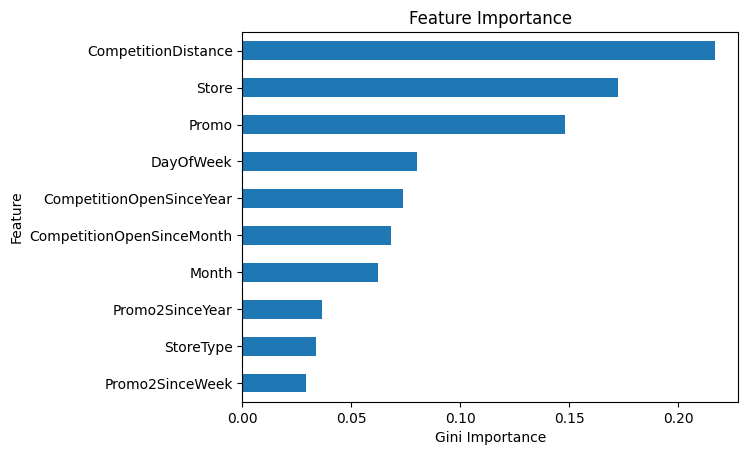

In [63]:
# Get feature names from training data
features = X_train.columns
# Extract importances from model
importances = rf_model.feature_importances_
# Create a series with feature names and importances
feat_imp = pd.Series(importances, index=features).sort_values()
# Plot 10 most important features
feat_imp.tail(10).plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");